# 0 IMPORTS

## 0.1 Importing libraries

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn              import metrics as mt
from sklearn.metrics      import mean_absolute_error
from sklearn              import tree as tr
from sklearn              import ensemble as en
from sklearn              import preprocessing as  pp
from sklearn              import linear_model as lm
from matplotlib           import pyplot as plt

## 0.2 Loading data

In [2]:
#Training Data
X_training = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_X_training.csv' )
y_training = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_y_training.csv')

#Validation Data
X_val = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_X_validation.csv')
y_val = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_y_val.csv')

#Test Data
X_test = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_X_test.csv')
y_test = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Regress_y_test.csv')

## 0.3 Concatenating Training + Validation sets


In [3]:
X = pd.concat([X_training, X_val], ignore_index=True)
y = pd.concat([y_training, y_val], ignore_index=True)

## 0.4 Add y column to the X training dataset

In [31]:
ds_exp = X_training.copy()

ds_exp['song_popularity'] = y_training

## 0.5 Data preparation

In [12]:
features =['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

In [13]:
algorithm = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Polinomial Regression', 'Polinomial Regression Lasso', 'Polinomial Regression Ridge',
             'Polinomial Regression Elastic Net', 'Linear Regression Lasso', 'Linear Regression Ridge', 'Linear Regression Elastic Net']

In [14]:


r2_list_train =[]
mse_list_train = []
rmse_list_train = []
mae_list_train = []
mape_list_train = []

r2_list_val =[]
mse_list_val = []
rmse_list_val = []
mae_list_val = []
mape_list_val = []

r2_list_test =[]
mse_list_test = []
rmse_list_test = []
mae_list_test = []
mape_list_test = []

# 1 DATA DESCRITPTION

## 1.1 Data Dimensions

In [16]:
print('Lines (training set): {:,}'.format(X_training.shape[0]))
print('Lines (validation set): {:,}'.format(X_val.shape[0]))
print('Lines (test set): {:,}'.format(X_test.shape[0]))
print('Columns: {:,}'.format(X_training.shape[1]))

Lines (training set): 10,547
Lines (validation set): 4,521
Lines (test set): 3,767
Columns: 13


## 1.2 Data Types

In [17]:
X_training.dtypes

song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature      float64
audio_valence       float64
dtype: object

In [12]:
X_training

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.6940,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.1160,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.3700,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.3700,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.4560,0.422914,1,0.0430,1.182630,0.8,0.362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,0.140830,0.015500,0.586,0.603,0.000042,0.363636,0.1380,-0.368055,0,0.0402,1.252451,0.8,0.556
10543,-0.658263,0.170000,0.664,0.617,0.000000,0.454545,0.2190,0.726111,1,0.0395,-0.769563,0.8,0.275
10544,-0.397854,0.515000,0.221,0.590,0.063600,0.181818,0.0934,-1.263306,0,0.0916,2.028881,0.8,0.713
10545,0.849085,0.068100,0.683,0.751,0.000008,0.454545,0.2480,-0.711921,1,0.0346,-0.628388,0.8,0.841


# 2 EXPLORATORY DATA ANALYSIS (EDA)

## 2.1 Correlation matrix

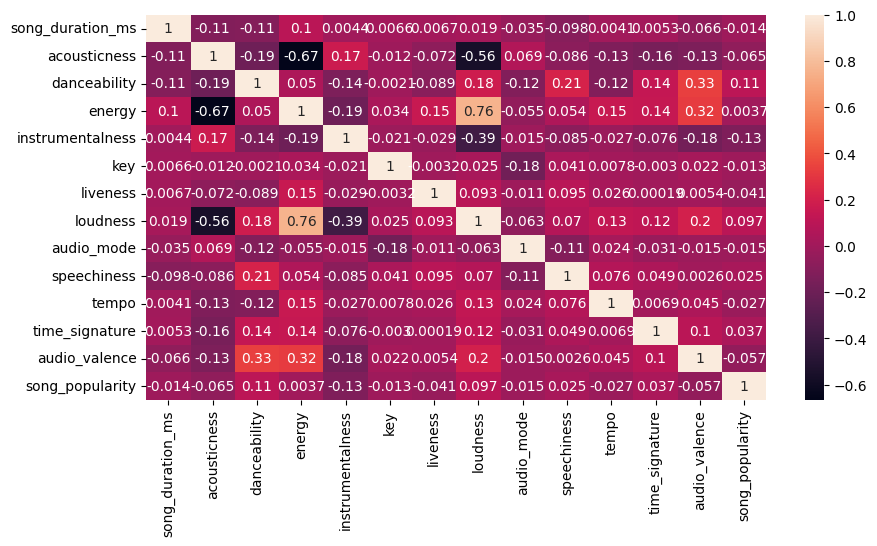

In [34]:
# presenca_do_mosquito, precipitacao, umidade, temperatura
corr = ds_exp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr, annot=True, ax=ax)

# 3 MACHINE LEARNING MODELING

## 3.1 Linear Regression

### 3.1.1 Model Training

In [16]:
# Model Definition
lr_model = LinearRegression()

# Model Fit (ajueste ou treinamento)
lr_model.fit( X, y )

LinearRegression()

#### 3.1.1.2 Features Importance

In [17]:
# Mostra os coeficientes de cada feature
lr_model.coef_

array([[ -0.30930841,  -2.86248151,  13.66561949, -10.05657587,
         -9.6102488 ,  -1.07008877,  -4.20716137,   2.62860142,
         -0.08114832,  -1.33387048,  -0.32946586,   8.94837413,
         -8.87679261]])

In [18]:
features_coef = pd.DataFrame(features, columns=['features'])
features_coef['coef'] = [ -0.20046868,  -3.65696235,  13.56830825, -10.08825907,
         -9.92988105,  -0.86974806,  -4.85538987,   2.49422937,
         -0.22283834,  -1.77163857,  -0.39798578,   7.31483515,
         -9.46824939 ]
features_coef

,features,coef
0,song_duration_ms,-0.200469
1,acousticness,-3.656962
2,danceability,13.568308
3,energy,-10.088259
4,instrumentalness,-9.929881
5,key,-0.869748
6,liveness,-4.855390
7,loudness,2.494229
8,audio_mode,-0.222838
9,speechiness,-1.771639


### 3.1.3 Performance

#### 3.1.3.1 Scores over training data

In [19]:
# Previsão
yhat_train = lr_model.predict( X_training )

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² (training): {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE (training): {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE (training): {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("MAE (training):", mae_train)

#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_true, y_pred = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training)) 

mape = mean_absolute_percentage_error(y_training, yhat_train)
print("MAPE (training):", mape, "%")


R² (training): 0.04582845643837585
MSE (training): 456.0
RMSE (training): 21.354156504062622
MAE (training): 17.00704296193131
MAPE (training): 8.645896274536046 %


In [20]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape)

#### 3.1.3.2 Scores over validation data

In [21]:
yhat_val = lr_model.predict( X_val )

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² (validation): {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE (validation): {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE (validation): {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("MAE  (validation):", mae_val)


#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_true, y_pred = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val)) 

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("MAPE (validation):", mape_val)


R² (validation): 0.04123123872129464
MSE (validation): 458.0
RMSE (validation): 21.400934559032695
MAE  (validation): 17.03437009204804
MAPE (validation): 8.673335856644092


In [22]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.1.3.3 Scores over test data

In [23]:
yhat_test = lr_model.predict( X_test )

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² (test): {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE (test): {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE (test): {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("MAE (test):", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_true, y_pred = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test)) 

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("MAPE (test):", mape_test, "%")


R² (test): 0.05116551777115064
MSE (test): 462.0
RMSE (test): 21.494185260204677
MAE (test): 17.144197086987703
MAPE (test): 8.531355027820084 %


In [24]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.2 Decision Tree Regressor

### 3.2.1 Default training

In [25]:
#Definição
model_dtr_default = tr.DecisionTreeRegressor(random_state=42 )

#Training/Fit
model_dtr_default.fit(X_training, y_training)

#Predict
yhat_train = model_dtr_default.predict(X_training) 

In [26]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² training (default): {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE training (default): {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE training (default): {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("MAE training (default):", mae_train)

#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("MAPE training (default):", mape_train, "%")

R² training (default): 0.9917566957405923
MSE training (default): 4.0
RMSE training (default): 2.0
MAE training (default): 0.21409852496986279


MAPE training (default): 8.886997336573547 %


### 3.2.2 Testing over validation set

In [27]:
yhat_val = model_dtr_default.predict(X_val) 

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² (validation): {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE (validation): {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE (validation): {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("MAE  (validation):", mae_val)


#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("MAPE Validation (default):", mape_val, "%")

R² (validation): -0.30391776516619506
MSE (validation): 623.0
RMSE (validation): 24.95996794869737
MAE  (validation): 17.166615476980443
MAPE Validation (default): 9.016347233358596 %


### 3.2.3 Finding the best max_depth

In [28]:
max_depth_values = np.arange(2, 45, 1)
rmse_list = []
mape_list = []
r2_list = []

for i in max_depth_values:
    # 1.Definição
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=42)
    
    # 2.Training/Fit
    model.fit(X_training, y_training)
    
    # 3.Performance
    #RMSE
    yhat_val = model.predict(X_val) 
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #MAPE
    mape_val = mean_absolute_percentage_error(y_val, yhat_val)
    mape_list.append(mape_val)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)
    

Min RMSE: 21.146189225511637


Text(0, 0.5, 'RMSE')

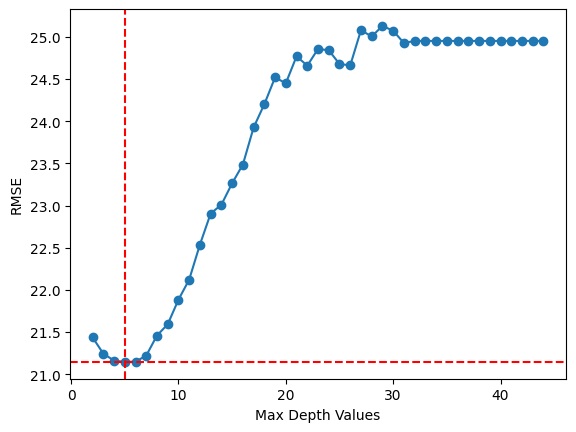

In [29]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_depth_values, rmse_list, marker='o')
plt.axvline(x=5, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('RMSE')

Min. MAPE: 21.146189225511637


Text(0, 0.5, 'MAPE')

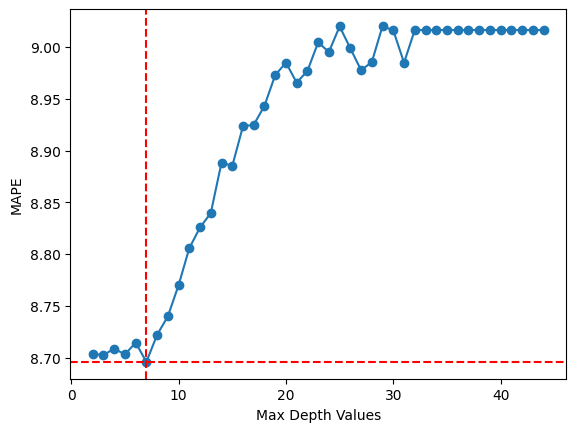

In [30]:
min_mape = min(mape_list)

print("Min. MAPE:", min_rmse)
plt.plot(max_depth_values, mape_list, marker='o')
plt.axvline(x=7, color='r', linestyle='--')
plt.axhline(y=min_mape, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('MAPE')

Max r²: 0.06355927779643322


Text(0, 0.5, 'R²')

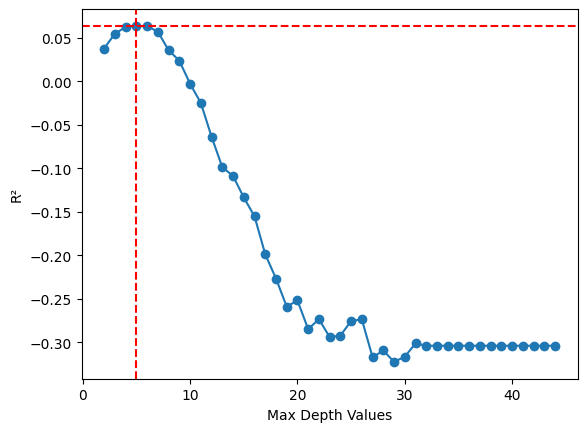

In [31]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_depth_values, r2_list, marker='o')
plt.axvline(x=5, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('R²')

### 3.2.4 Training with the best paramenters

In [32]:
#Definição
model_decision_tree = tr.DecisionTreeRegressor(max_depth= 5 )

#Training/Fit
model_decision_tree.fit(X, y)


DecisionTreeRegressor(max_depth=5)

### 3.3.5 Performance

#### 3.3.5.1 Scores over training set

In [33]:
yhat_train = model_decision_tree.predict( X_training )

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.10405442217022431
MSE do treino: 428.0
RMSE do treino: 20.688160865577203
Mean Absolute Error (MAE) do treino: 16.464077424152936
Mean Absolute Percentage Error (MAPE) do treino: 8.75502240613223


In [34]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.3.5.2 Scores over validation set

In [35]:
yhat_val = model_decision_tree.predict( X_val )

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.10104974910335107
MSE da validação: 429.0
RMSE da validação: 20.71231517720798
Mean Absolute Error (MAE) da validação: 16.5305052256939
Mean Absolute Percentage Error (MAPE) da validação: 8.702629461442903


In [36]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.3.5.3 Scores over test set

In [37]:
yhat_test = model_decision_tree.predict( X_test )

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.09047547149696622
MSE de Teste: 443.0
RMSE de Teste: 21.047565179849187
Mean Absolute Error (MAE) de Teste: 16.829780949988823
Mean Absolute Percentage Error (MAPE) do treino: 8.723921508415643


In [38]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.3 Random Forest Regressor

### 3.3.1 Default training

In [39]:
model_rf_default = en.RandomForestRegressor(random_state=42)

# Training/Fit
model_rf_default.fit(X_training, y_training)

# Performance

yhat_train = model_rf_default.predict(X_training)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [40]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² training (default): {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE training (default): {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE training (default): {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("MAE training (default):", mae_train)

#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("MAPE training (default):", mape_train, "%")

R² training (default): 0.903200588722743
MSE training (default): 46.0
RMSE training (default): 6.782329983125268
MAE training (default): 4.8564751788188945
MAPE training (default): 8.883710055215174 %


### 3.3.2 Testing default over validation set

In [41]:
yhat_val = model_rf_default.predict(X_val) 

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² (validation): {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE (validation): {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE (validation): {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("MAE  (validation):", mae_val)


#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("MAPE Validation (default):", mape_val, "%")

R² (validation): 0.3317899098557302
MSE (validation): 319.0
RMSE (validation): 17.86057109949175
MAE  (validation): 13.028930969277102
MAPE Validation (default): 8.855737983622593 %


### 3.3.3 Fiding the best parameters

#### 3.3.3.0 Fiding the best n_estimator with max_depth none

In [42]:
n_estimators = np.arange(90, 111, 1)
rmse_list = []
mape_list = []
r2_list = []


for i in n_estimators:
    # 1.Definição
    model = en.RandomForestRegressor(n_estimators=i, random_state=42)
    
    # 2.Training/Fit
    model.fit(X_training, y_training)

    # 3.Performance
    #RMSE
    yhat_val = model.predict(X_val) 
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #MAPE
    mape_val = mean_absolute_percentage_error(y_val, yhat_val)
    mape_list.append(mape_val)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\sit

Min RMSE: 17.843494480847273


Text(0, 0.5, 'RMSE')

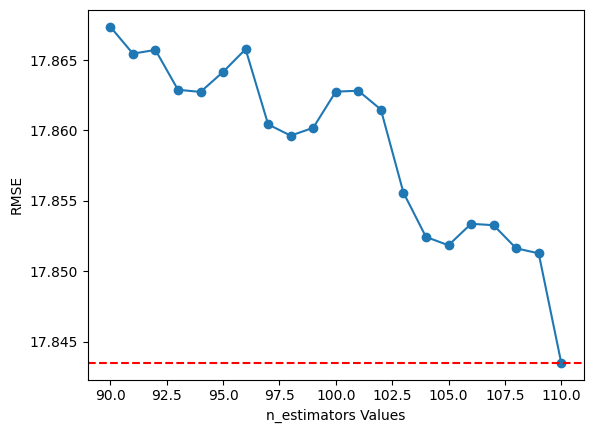

In [43]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(n_estimators, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Min. MAPE: 17.843494480847273


Text(0, 0.5, 'MAPE')

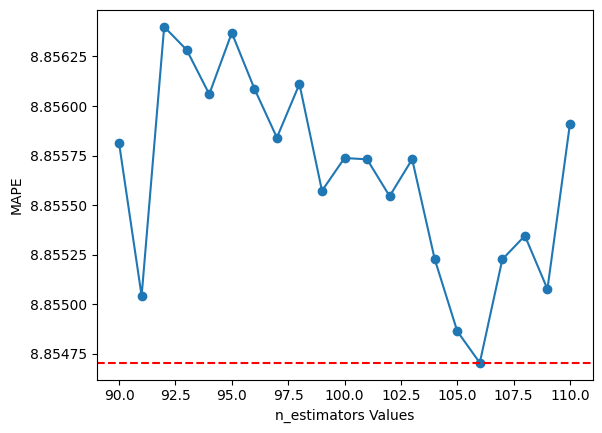

In [44]:
min_mape = min(mape_list)

print("Min. MAPE:", min_rmse)
plt.plot(n_estimators, mape_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_mape, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('MAPE')

Max r²: 0.3332302559439658


Text(0, 0.5, 'R²')

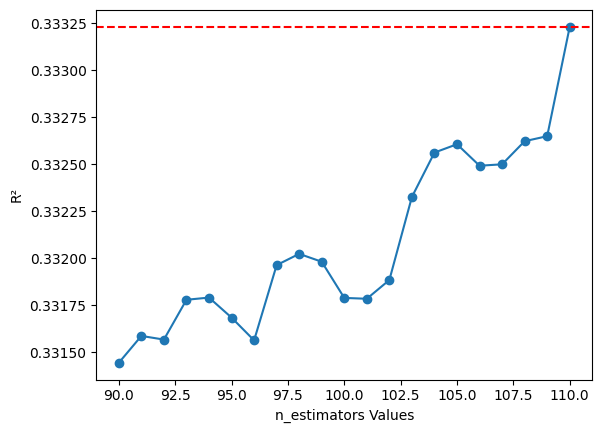

In [45]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(n_estimators, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

#### 3.3.3.1 Fiding the best max_depth value

In [46]:
max_depth_values = np.arange(1, 30, 1)
rmse_list = []
mape_list = []
r2_list = []


for i in max_depth_values:
    # 1.Definição
    model = en.RandomForestRegressor(max_depth=i, random_state=42)
    
    # 2.Training/Fit
    model.fit(X_training, y_training)

    # 3.Performance
    #RMSE
    yhat_val = model.predict(X_val) 
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #MAPE
    mape_val = mean_absolute_percentage_error(y_val, yhat_val)
    mape_list.append(mape_val)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\sit

Min RMSE: 17.835913735643157


Text(0, 0.5, 'RMSE')

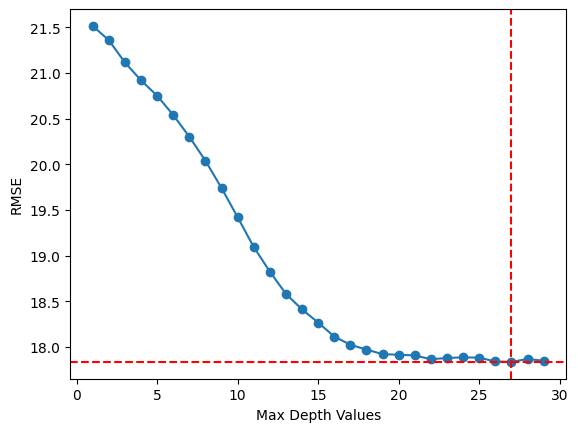

In [47]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_depth_values, rmse_list, marker='o')
plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('RMSE')

Min. MAPE: 17.835913735643157


Text(0, 0.5, 'MAPE')

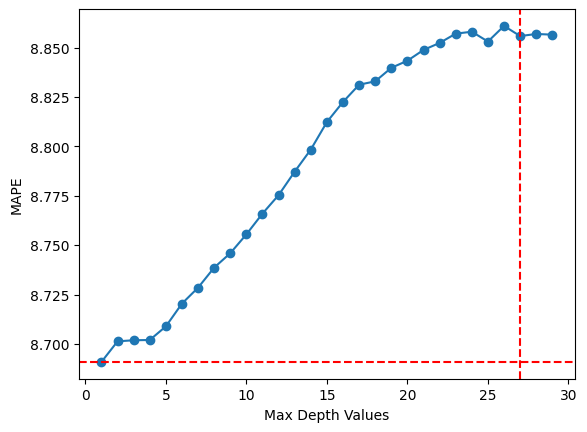

In [48]:
min_mape = min(mape_list)

print("Min. MAPE:", min_rmse)
plt.plot(max_depth_values, mape_list, marker='o')
plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_mape, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('MAPE')

Max r²: 0.3337966851070485


Text(0, 0.5, 'R²')

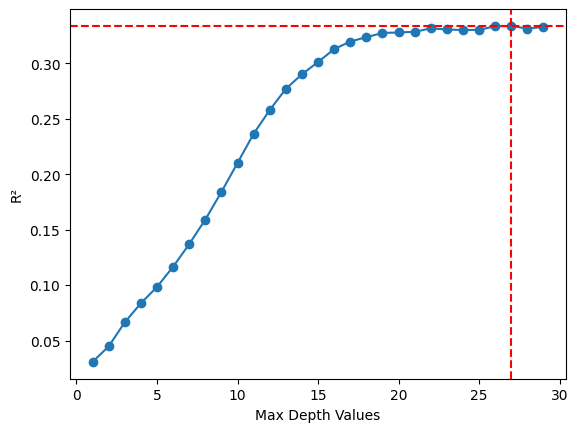

In [49]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_depth_values, r2_list, marker='o')
plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('R²')

#### 3.3.3.2 Finding the best n_estimator value with max_depth =27

In [50]:
n_estimators = np.arange(95, 130, 1)
rmse_list = []
mape_list = []
r2_list = []


for i in n_estimators:
    # 1.Definição
    model = en.RandomForestRegressor(max_depth=27, n_estimators=i, random_state=42)
    
    # 2.Training/Fit
    model.fit(X_training, y_training)

    # 3.Performance
    #RMSE
    yhat_val = model.predict(X_val) 
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #MAPE
    mape_val = mean_absolute_percentage_error(y_val, yhat_val)
    mape_list.append(mape_val)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\sit

Min RMSE: 17.803127765199164


Text(0, 0.5, 'RMSE')

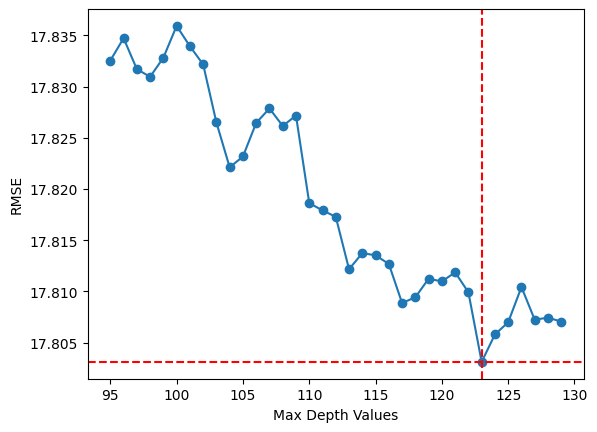

In [51]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(n_estimators, rmse_list, marker='o')
plt.axvline(x=123, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('RMSE')

Min. MAPE: 17.803127765199164


Text(0, 0.5, 'MAPE')

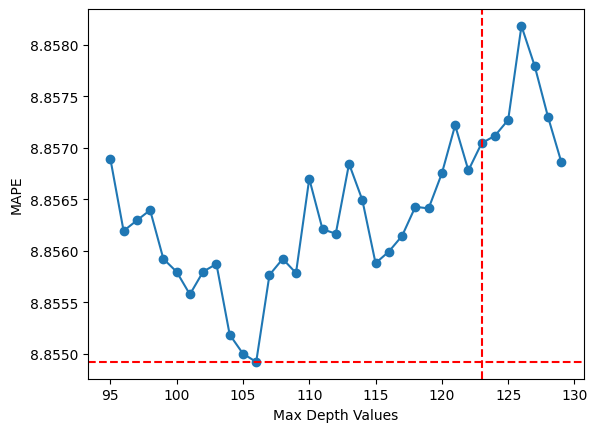

In [52]:
min_mape = min(mape_list)

print("Min. MAPE:", min_rmse)
plt.plot(n_estimators, mape_list, marker='o')
plt.axvline(x=123, color='r', linestyle='--')
plt.axhline(y=min_mape, color='r', linestyle='--')
plt.xlabel('Max Depth Values')
plt.ylabel('MAPE')

Max r²: 0.3362436634255681


Text(0, 0.5, 'R²')

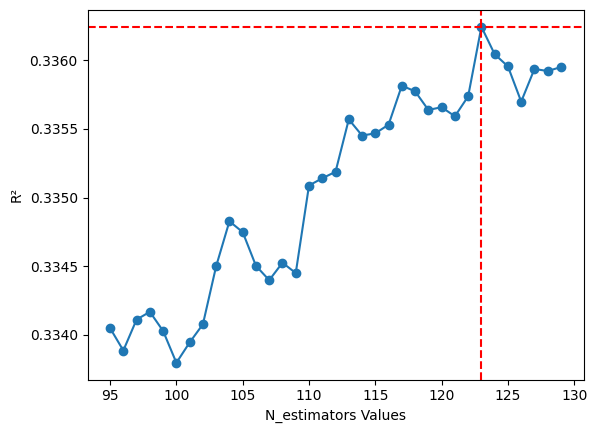

In [53]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(n_estimators, r2_list, marker='o')
plt.axvline(x=123, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('N_estimators Values')
plt.ylabel('R²')

In [54]:
max_depth_values = np.arange(2, 45, 1)

for i in max_depth_values:
    # 1.Definição
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=42)
    
    # 2.Training/Fit
    model.fit(X_training, y_training)
    

    

### 3.3.4 Training with the best parameters

In [55]:
# Definition
# -> n_estimators - quantidade de árvores
# max_depth - profundidade das árvores
model_rf_final = en.RandomForestRegressor(n_estimators=123, 
                                          max_depth=27, 
                                          random_state=42)

# Training/Fit
model_rf_final.fit(X, y)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=27, n_estimators=123, random_state=42)

### 3.3.5 Performance

#### 3.3.5.1 Scores over training set

In [56]:
yhat_train = model_rf_final.predict( X_training )

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.9060560804579016
MSE do treino: 45.0
RMSE do treino: 6.708203932499369
Mean Absolute Error (MAE) do treino: 4.6558486475882885
Mean Absolute Percentage Error (MAPE) do treino: 8.893427423345742


In [57]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.3.5.2 Scores over validation set

In [58]:
yhat_val = model_rf_final.predict( X_val )

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.9034076586971579
MSE da validação: 46.0
RMSE da validação: 6.782329983125268
Mean Absolute Error (MAE) da validação: 4.730845829282089
Mean Absolute Percentage Error (MAPE) da validação: 8.82845137164212


In [59]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.3.5.3 Scores over test set

In [60]:
yhat_test = model_rf_final.predict( X_test )

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.40134779795906683
MSE de Teste: 291.0
RMSE de Teste: 17.05872210923198
Mean Absolute Error (MAE) de Teste: 12.286840537944322
Mean Absolute Percentage Error (MAPE) do treino: 8.891765267558878


In [61]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.4 Polinomial Regression

### 3.4.1 Default Training

In [62]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures()
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)


# Treinando o modelo de regressão polinomial
model_poly_default = lm.LinearRegression()
model_poly_default.fit(X_poly_train, y_training)


LinearRegression()

In [63]:
yhat_train = model_poly_default.predict( X_poly_train )

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.09419491057528084
MSE do treino: 433.0
RMSE do treino: 20.808652046684813
Mean Absolute Error (MAE) do treino: 16.458031755824443
Mean Absolute Percentage Error (MAPE) do treino: 8.35053982092813


### 3.4.2 Testing over validation set

In [64]:
yhat_val = model_poly_default.predict( X_poly_val )

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.06647668389711592
MSE da validação: 446.0
RMSE da validação: 21.118712081942874
Mean Absolute Error (MAE) da validação: 16.74993909048403
Mean Absolute Percentage Error (MAPE) da validação: 8.547931034605398


### 3.4.3 Fiding the best degree value

In [65]:
degree = np.arange(2, 5, 1)
rmse_list = []
mape_list = []
r2_list = []


for i in degree:
# 1. Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)

    # 2. Treinando o modelo de regressão polinomial
    model_poly = lm.LinearRegression()
    model_poly.fit(X_poly_train, y_training)
    
    # 3. Predict
    yhat_val = model_poly.predict( X_poly_val )

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.113223900467588


Text(0, 0.5, 'RMSE')

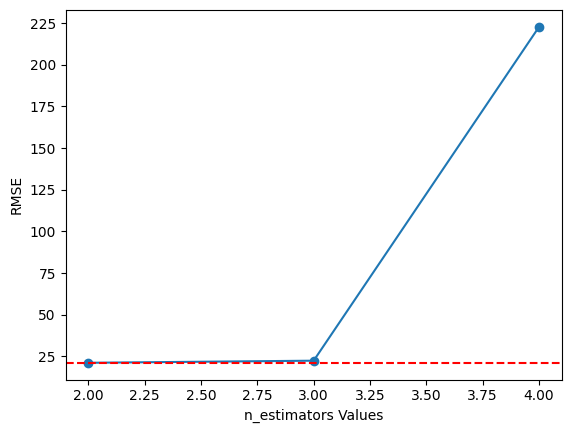

In [66]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(degree, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.06647668389711592


Text(0, 0.5, 'R²')

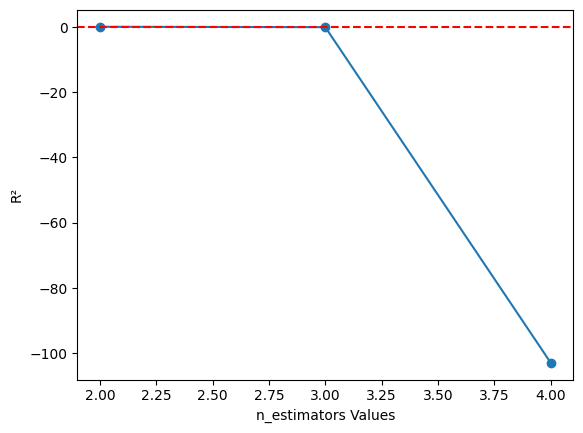

In [67]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(degree, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

### 3.4.4 Training with best parameter

In [68]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)


# Treinando o modelo de regressão polinomial
model_poly = lm.LinearRegression()
model_poly.fit(X_poly, y)


LinearRegression()

### 3.4.5 Performance

#### 3.4.5.1 Scores over training set

In [69]:
yhat_train = model_poly.predict( X_poly_train )
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.0917914704378251
MSE do treino: 434.0
RMSE do treino: 20.83266665599966
Mean Absolute Error (MAE) do treino: 16.505083068976564
Mean Absolute Percentage Error (MAPE) do treino: 8.386161205996613


In [70]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.4.5.1 Scores over validation set

In [71]:
yhat_val = model_poly.predict( X_poly_val )

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.08055381068266088
MSE da validação: 439.0
RMSE da validação: 20.952326839756964
Mean Absolute Error (MAE) da validação: 16.620266501163904
Mean Absolute Percentage Error (MAPE) da validação: 8.508183366159107


In [72]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.4.5.1 Scores over test set

In [73]:
yhat_test = model_poly.predict( X_poly_test )

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.09090059850602472
MSE de Teste: 443.0
RMSE de Teste: 21.047565179849187
Mean Absolute Error (MAE) de Teste: 16.73641406135
Mean Absolute Percentage Error (MAPE) do treino: 8.276971685015493


In [74]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.5 Polinomial Regression Lasso

### 3.5.1 Default training model

In [75]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial lasso
lasso = lm.Lasso(random_state=42)
lasso.fit(X_poly_train, y_training)

# Predict
yhat_train = lasso.predict(X_poly_train)

In [76]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.009149935251170582
MSE do treino: 474.0
RMSE do treino: 21.77154105707724
Mean Absolute Error (MAE) do treino: 17.285449661261286
Mean Absolute Percentage Error (MAPE) do treino: 8.74284832975626


### 3.5.2 Testing default model over validation data

In [77]:
yhat_train = lasso.predict(X_poly_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.08055381068266088
MSE da validação: 439.0
RMSE da validação: 20.952326839756964
Mean Absolute Error (MAE) da validação: 16.620266501163904
Mean Absolute Percentage Error (MAPE) da validação: 8.508183366159107


### 3.5.3 Finding the best parameters

#### 3.5.3.1 Fiding the best alpha value

In [78]:
alpha = np.arange(1, 10, 1)
rmse_list = []
r2_list = []


for i in alpha:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial lasso
    lasso = lm.Lasso(alpha = i, random_state=42)
    lasso.fit(X_poly_train, y_training)
    
    # 3. Predict
    yhat_val = lasso.predict( X_poly_val )

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.746555909136408


Text(0, 0.5, 'RMSE')

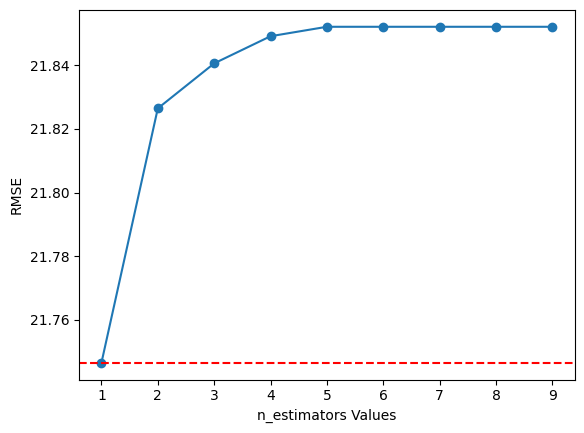

In [79]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.009631007774810185


Text(0, 0.5, 'R²')

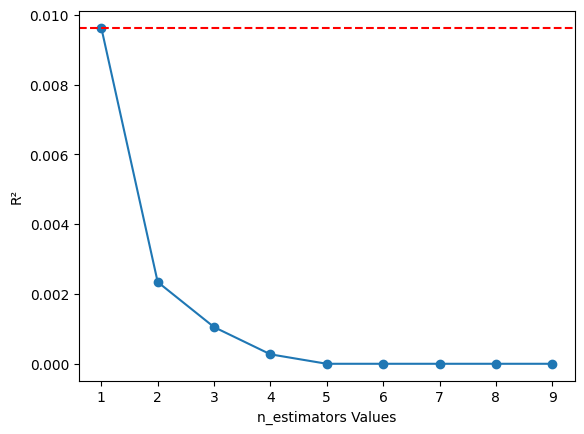

In [80]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(alpha, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

#### 3.5.3.2 Fiding the best max_iter

In [81]:
max_iter = np.arange(1, 1000, 100)
rmse_list = []
r2_list = []


for i in max_iter:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial lasso
    lasso = lm.Lasso(alpha = 1, max_iter=i, random_state=42)
    lasso.fit(X_poly_train, y_training)
    
    # 3. Predict
    yhat_val = lasso.predict( X_poly_val )

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Min RMSE: 21.746555909136408


Text(0, 0.5, 'RMSE')

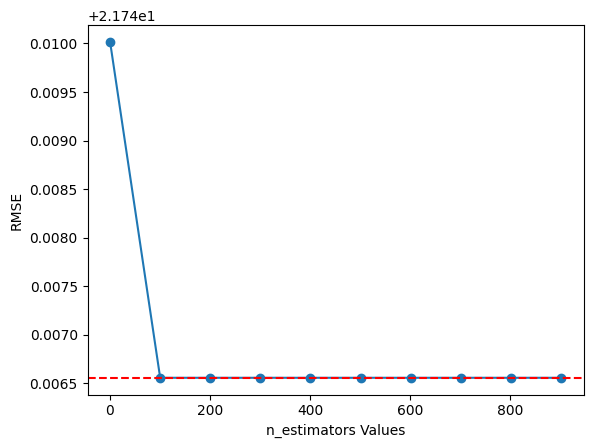

In [82]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.009631007774810185


Text(0, 0.5, 'R²')

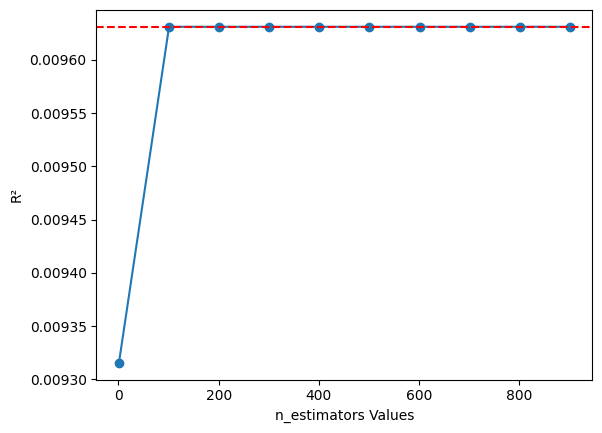

In [83]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

### 3.5.4 Training the model with best parameters

In [84]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial lasso
lasso = lm.Lasso(alpha = 1, max_iter=100, random_state=42)
lasso.fit(X_poly, y)

Lasso(alpha=1, max_iter=100, random_state=42)

### 3.5.5 Performance

#### 3.5.5.1 Performance over training data

In [85]:
# Predict
yhat_train = lasso.predict(X_poly_train)

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.009115219293644117
MSE do treino: 474.0
RMSE do treino: 21.77154105707724
Mean Absolute Error (MAE) do treino: 17.287913840270782
Mean Absolute Percentage Error (MAPE) do treino: 8.741798269564972


In [86]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.5.5.2 Performance over validation data

In [87]:
# Predict
yhat_val = lasso.predict(X_poly_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.009650359997426028
MSE da validação: 473.0
RMSE da validação: 21.748563170931547
Mean Absolute Error (MAE) da validação: 17.24034700846657
Mean Absolute Percentage Error (MAPE) da validação: 8.678876386795533


In [88]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.5.5.3 Performance over test data

In [89]:
# Predict
yhat_test = lasso.predict(X_poly_test)

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.008803004933415903
MSE de Teste: 483.0
RMSE de Teste: 21.97726097583591
Mean Absolute Error (MAE) de Teste: 17.456171144521186
Mean Absolute Percentage Error (MAPE) do treino: 8.71113322017825


In [90]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.6 Polinomial Regression Ridge

### 3.6.1 Default training

In [91]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial lasso
Ridge_default = lm.Ridge(random_state=42)
Ridge_default.fit(X_poly_train, y_training)

# Predict
yhat_train = Ridge_default.predict(X_poly_train)

In [92]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.09317140761274367
MSE do treino: 433.0
RMSE do treino: 20.808652046684813
Mean Absolute Error (MAE) do treino: 16.471971837686482
Mean Absolute Percentage Error (MAPE) do treino: 8.372689165744589


### 3.6.2 Testing default model over validation data

In [93]:
yhat_val = Ridge_default.predict(X_poly_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.06769929966791699
MSE da validação: 445.0
RMSE da validação: 21.095023109728988
Mean Absolute Error (MAE) da validação: 16.73874061169059
Mean Absolute Percentage Error (MAPE) da validação: 8.568992470935264


### 3.6.3 Fiding the best parameters

#### 3.6.3.1 Fiding the best alpha

In [94]:
alpha = np.arange(1, 20, 1)
rmse_list = []
r2_list = []


for i in alpha:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial lasso
    Ridge_default = lm.Ridge(alpha=i, random_state=42)
    Ridge_default.fit(X_poly_train, y_training)

    # Predict
    yhat_val = Ridge_default.predict(X_poly_val)

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.09939359895817


Text(0, 0.5, 'RMSE')

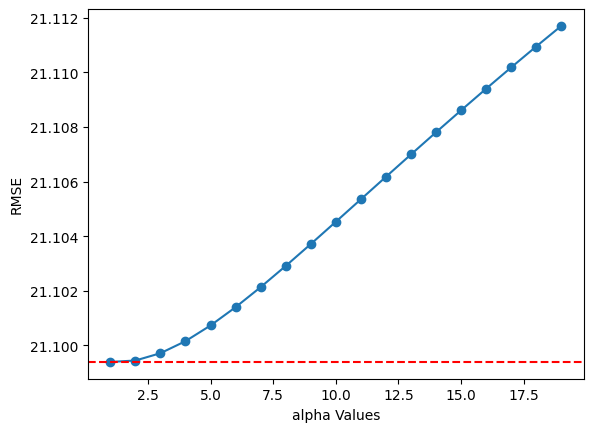

In [95]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('alpha Values')
plt.ylabel('RMSE')

Min RMSE: 21.09939359895817


Text(0, 0.5, 'RMSE')

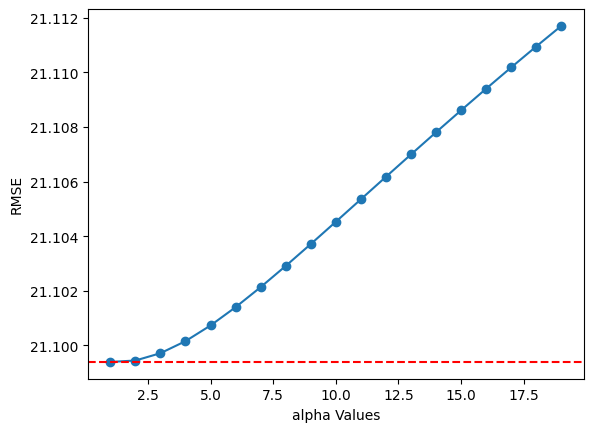

In [96]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('alpha Values')
plt.ylabel('RMSE')

#### 3.6.3.2 Fiding the best max_iter

In [97]:
max_iter = np.arange(1, 10, 1)
rmse_list = []
r2_list = []


for i in max_iter:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial lasso
    Ridge = lm.Ridge(alpha=1, max_iter = i, random_state=42)
    Ridge.fit(X_poly_train, y_training)

    # Predict
    yhat_val = Ridge.predict(X_poly_val)

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.09939359895817


Text(0, 0.5, 'RMSE')

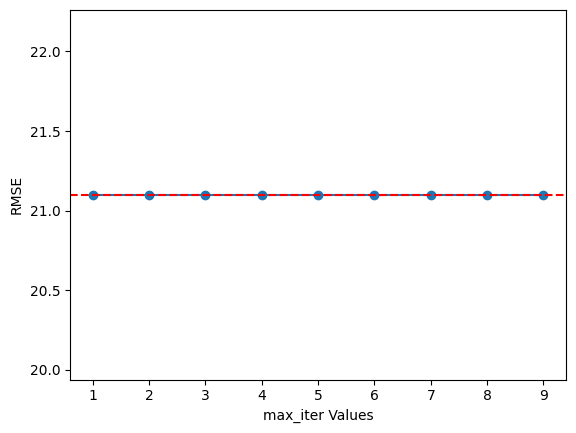

In [98]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('RMSE')

Max r²: 0.06769929966791699


Text(0, 0.5, 'R²')

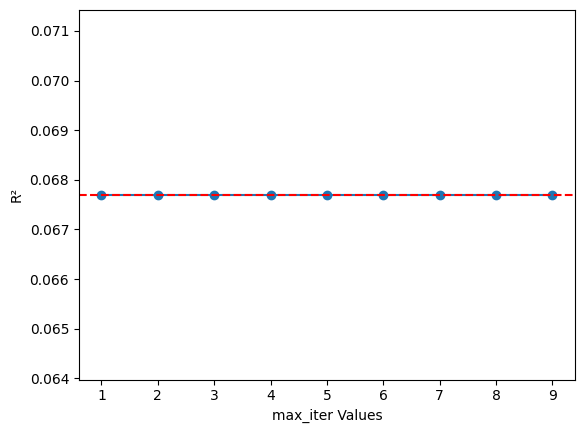

In [99]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('R²')

### 3.6.4 Training model with the best parameters

In [100]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial lasso
Ridge = lm.Ridge(alpha=1, max_iter=1)
Ridge.fit(X_poly, y)

# Predict
yhat_train = Ridge.predict(X_poly_train)
yhat_val = Ridge.predict(X_poly_val)
yhat_test = Ridge.predict(X_poly_test)

### 3.6.5 Performance

#### 3.6.5.1 Performance over Training set

In [101]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.09108998052839334
MSE do treino: 434.0
RMSE do treino: 20.83266665599966
Mean Absolute Error (MAE) do treino: 16.514027467816625
Mean Absolute Percentage Error (MAPE) do treino: 8.398783933750702


In [102]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.6.5.2 Performance over Validation set

In [103]:
# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.08040275892094029
MSE da validação: 439.0
RMSE da validação: 20.952326839756964
Mean Absolute Error (MAE) da validação: 16.622758005791436
Mean Absolute Percentage Error (MAPE) da validação: 8.52421503378616


In [104]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.6.5.3 Performance over Test set

In [105]:
# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.09023105908000806
MSE de Teste: 443.0
RMSE de Teste: 21.047565179849187
Mean Absolute Error (MAE) de Teste: 16.742213878468085
Mean Absolute Percentage Error (MAPE) do treino: 8.308500709997753


In [106]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.7 Polinomial Regression Elastic Net

### 3.7.1 Default training

In [107]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial elastic net
elastic_net_default = lm.ElasticNet(random_state=42)
elastic_net_default.fit(X_poly_train, y_training)

# Predict
yhat_train = elastic_net_default.predict(X_poly_train)

In [108]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)

#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.012832763427018778
MSE do treino: 472.0
RMSE do treino: 21.72556098240043
Mean Absolute Error (MAE) do treino: 17.244236014680347
Mean Absolute Percentage Error (MAPE) do treino: 8.743103767975903


### 3.7.2 Testing Default Model Over Validation Data

In [109]:
yhat_val = elastic_net_default.predict(X_poly_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.012781775822342856
MSE da validação: 471.0
RMSE da validação: 21.702534414210707
Mean Absolute Error (MAE) da validação: 17.19996619878308
Mean Absolute Percentage Error (MAPE) da validação: 8.679387642445832


### 3.7.3 Fiding the best parameters

#### 3.7.3.1 Fiding the best alpha

In [110]:
alpha = np.arange(1, 4, 1)
rmse_list = []
r2_list = []


for i in alpha:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial elastic net
    elastic_net = lm.ElasticNet(alpha=i, l1_ratio=0, random_state=42)
    elastic_net.fit(X_poly_train, y_training)

    # Predict
    yhat_val = elastic_net.predict(X_poly_val)

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.490e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term

Min RMSE: 21.593401671026182


Text(0, 0.5, 'RMSE')

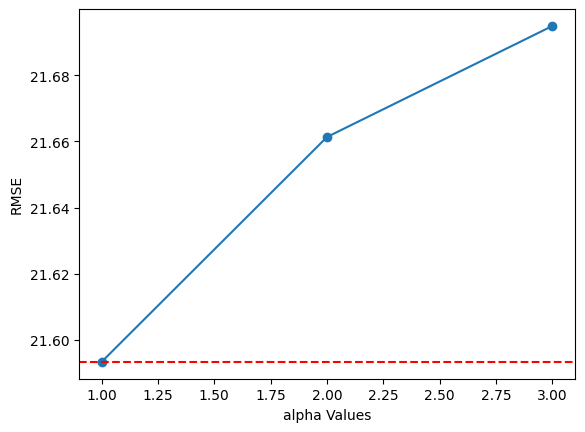

In [111]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('alpha Values')
plt.ylabel('RMSE')

In [112]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(l1_ratio, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('l1_ratio Values')
plt.ylabel('R²')

Max r²: 0.023531608339732002


NameError: name 'l1_ratio' is not defined

#### 3.7.3.2 Fiding the best l1_ratio

In [ ]:
l1_ratio = [0, 0.5, 1]
rmse_list = []
r2_list = []


for i in l1_ratio:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial elastic net
    elastic_net = lm.ElasticNet(alpha=1, l1_ratio=i, random_state=42)
    elastic_net.fit(X_poly_train, y_training)

    # Predict
    yhat_val = elastic_net.predict(X_poly_val)

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Min RMSE: 21.593401671026182


Text(0, 0.5, 'RMSE')

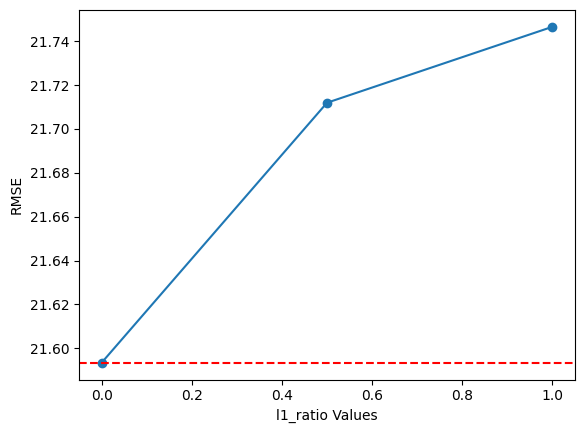

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(l1_ratio, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('l1_ratio Values')
plt.ylabel('RMSE')

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(l1_ratio, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('l1_ratio Values')
plt.ylabel('R²')

#### 3.7.3.3 Fiding the best max_iter

In [ ]:
max_iter = np.arange(1, 20, 1)
rmse_list = []
r2_list = []


for i in max_iter:
    # Criando a matriz de features polinomiais
    poly = pp.PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_training)
    X_poly_val = poly.fit_transform(X_val)
    X_poly_test = poly.fit_transform(X_test)

    # Treinando o modelo de regressão polinomial elastic net
    elastic_net = lm.ElasticNet(alpha=1, l1_ratio=0, max_iter=i, random_state=42)
    elastic_net.fit(X_poly_train, y_training)

    # Predict
    yhat_val = elastic_net.predict(X_poly_val)

    # 4. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.58935075503698


Text(0, 0.5, 'RMSE')

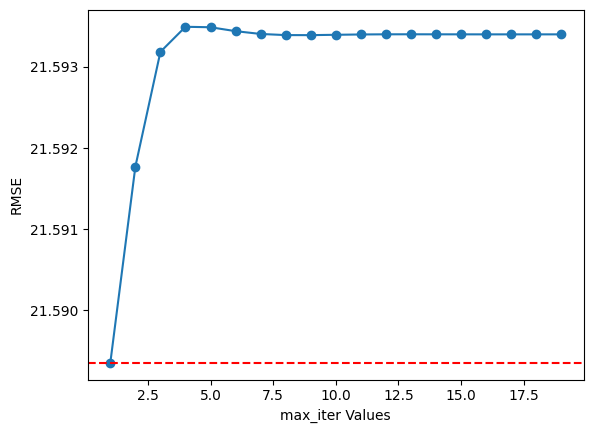

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('RMSE')

Max r²: 0.023897944357287204


Text(0, 0.5, 'R²')

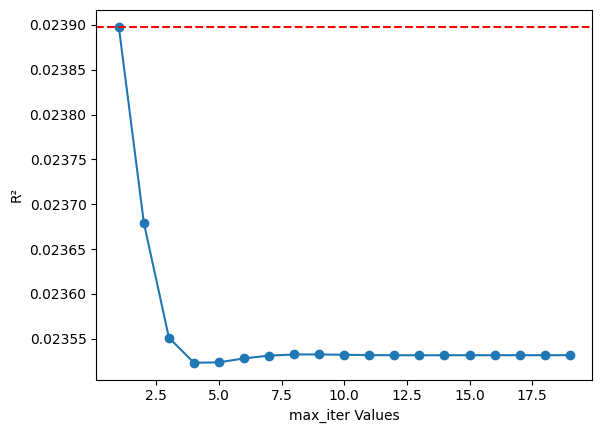

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('R²')

### 3.7.4 Training model with best parameters

In [113]:
# Criando a matriz de features polinomiais
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train = poly.fit_transform(X_training)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Treinando o modelo de regressão polinomial lasso
elastic_net = lm.ElasticNet(alpha=1, l1_ratio=0, max_iter=1, random_state=42)
elastic_net.fit(X_poly, y)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.544e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1, l1_ratio=0, max_iter=1, random_state=42)

### 3.7.5 Performance

#### 3.7.5.1 Performance over training data set

In [114]:
yhat_train = elastic_net.predict(X_poly_train)

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.026212590302060246
MSE do treino: 465.0
RMSE do treino: 21.563858652847824
Mean Absolute Error (MAE) do treino: 17.132296446209754
Mean Absolute Percentage Error (MAPE) do treino: 8.742712989518944


In [115]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.7.5.2 Performance over validation data set

In [116]:
yhat_val = elastic_net.predict(X_poly_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.024651887070984424
MSE da validação: 466.0
RMSE da validação: 21.587033144922902
Mean Absolute Error (MAE) da validação: 17.09320849810502
Mean Absolute Percentage Error (MAPE) da validação: 8.681217830829269


In [117]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.7.5.3 Performance over test data set

In [118]:
yhat_test = elastic_net.predict(X_poly_test)

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.02336607564514892
MSE de Teste: 476.0
RMSE de Teste: 21.817424229271428
Mean Absolute Error (MAE) de Teste: 17.310628629459405
Mean Absolute Percentage Error (MAPE) do treino: 8.717941472946054


In [119]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.8 Linear Regression Lasso

### 3.8.1 Default Model

In [ ]:
#Lasso (L1)
lasso_default = lm.Lasso(random_state=42)
lasso_default.fit(X_training, y_training)

# Predict
yhat_train = lasso_default.predict(X_training)

In [ ]:
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.007400905609184383
MSE do treino: 474.0
RMSE do treino: 21.77154105707724
Mean Absolute Error (MAE) do treino: 17.305483795260546
Mean Absolute Percentage Error (MAPE) do treino: 8.742731440964233


### 3.8.2 Testing default model over validation data

In [ ]:
yhat_val = lasso_default.predict(X_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.007883642924698453
MSE da validação: 474.0
RMSE da validação: 21.77154105707724
Mean Absolute Error (MAE) da validação: 17.26492176467576
Mean Absolute Percentage Error (MAPE) da validação: 8.681849756679217


### 3.8.3 Fiding the best parameters

#### 3.8.2.1 Fiding the best alpha value

In [ ]:
alpha = np.arange(1, 10, 1)
rmse_list = []
r2_list = []


for i in alpha:
    #Lasso (L1)
    lasso = lm.Lasso(alpha=i, random_state=42)
    lasso.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = lasso.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.76573180289256


Text(0, 0.5, 'RMSE')

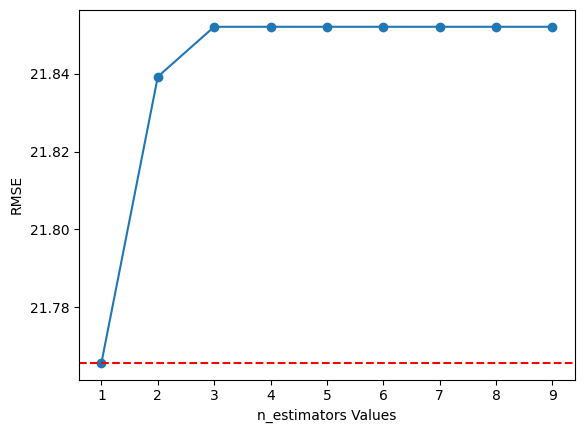

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.007883642924698453


Text(0, 0.5, 'R²')

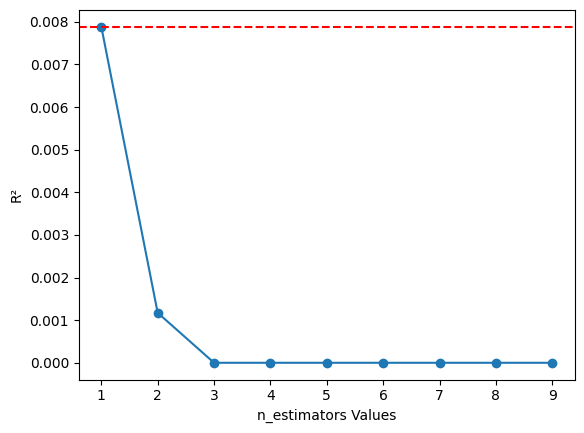

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(alpha, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

#### 3.8.2.2 Fiding the best max_iter

In [ ]:
max_iter = [1, 50, 10000] 
rmse_list = []
r2_list = []


for i in max_iter:
    #Lasso (L1)
    lasso = lm.Lasso(alpha=1, max_iter=i, random_state=42)
    lasso.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = lasso.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.76573180289256


Text(0, 0.5, 'RMSE')

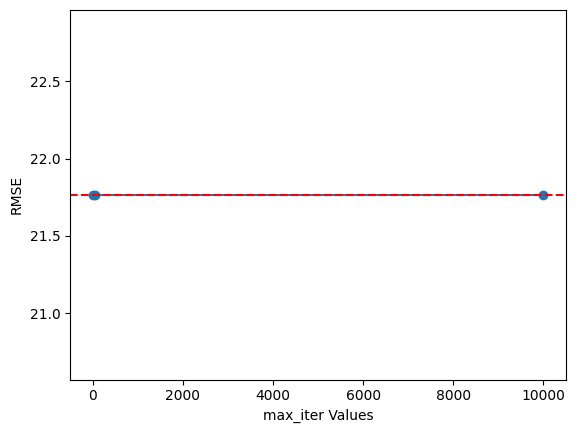

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
#plt.axvline(x=27, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('RMSE')

Max r²: 0.007883642924698453


Text(0, 0.5, 'R²')

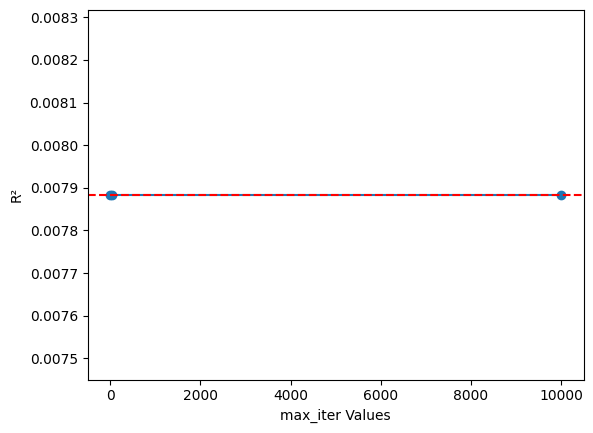

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
#plt.axvline(x=100, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('R²')

### 3.8.4 Traning model with the best parameters

In [120]:
#Lasso (L1) (tende a zerar os parâmetros)
lasso = lm.Lasso(alpha=1, max_iter=1)
lasso.fit(X_training, y_training)

Lasso(alpha=1, max_iter=1)

### 3.8.5 Performance

#### 3.8.5.1 Performance over Traning Data

In [121]:
yhat_train = lasso.predict(X_training)
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.007400905609184383
MSE do treino: 474.0
RMSE do treino: 21.77154105707724
Mean Absolute Error (MAE) do treino: 17.305483795260546
Mean Absolute Percentage Error (MAPE) do treino: 8.742731440964233


In [122]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.8.5.2 Performance over Validation Data

In [123]:
yhat_val = lasso.predict(X_val)
# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.007883642924698453
MSE da validação: 474.0
RMSE da validação: 21.77154105707724
Mean Absolute Error (MAE) da validação: 17.26492176467576
Mean Absolute Percentage Error (MAPE) da validação: 8.681849756679217


In [124]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.8.5.3 Performance over Test Data

In [125]:
yhat_test = lasso.predict(X_test)

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.007646329790263473
MSE de Teste: 483.0
RMSE de Teste: 21.97726097583591
Mean Absolute Error (MAE) de Teste: 17.472989425619936
Mean Absolute Percentage Error (MAPE) do treino: 8.71326605701818


In [126]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.9 Linear Regression Ridge

### 3.9.1 Default Model Training

In [ ]:
#Ridge
# Model
ridge_default = lm.Ridge(random_state=42)
# Fit
ridge_default.fit(X_training, y_training)

Ridge(random_state=42)

In [ ]:
# Predict
yhat_train = ridge_default.predict(X_training)

# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.04605770063554282
MSE do treino: 456.0
RMSE do treino: 21.354156504062622
Mean Absolute Error (MAE) do treino: 16.998307602320097
Mean Absolute Percentage Error (MAPE) do treino: 8.653414734181558


### 3.9.2 Testing Default Model Over Validation Data

In [ ]:
yhat_val = ridge_default.predict(X_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.03992810824954407
MSE da validação: 458.0
RMSE da validação: 21.400934559032695
Mean Absolute Error (MAE) da validação: 17.0394715713122
Mean Absolute Percentage Error (MAPE) da validação: 8.682412484475343


### 3.9.3 Fiding The Best Parameters

#### 3.9.3.1 Fiding the best alpha value

In [ ]:
alpha = np.arange(1, 30, 1)
rmse_list = []
r2_list = []


for i in alpha:
    # Model
    ridge = lm.Ridge(alpha= i,random_state=42)
    # Fit
    ridge.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = ridge.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


Min RMSE: 21.411228443084262


Text(0, 0.5, 'RMSE')

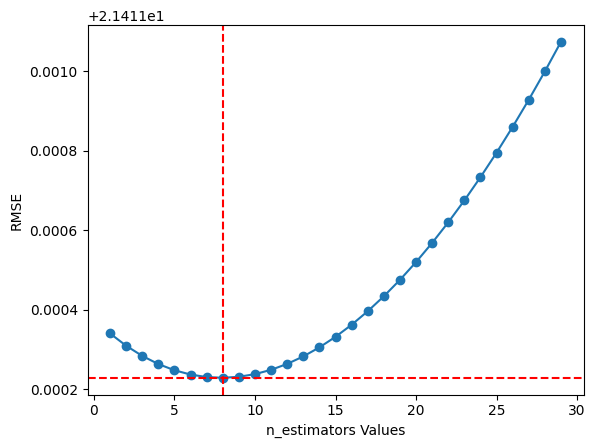

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.03993810419903965


Text(0, 0.5, 'R²')

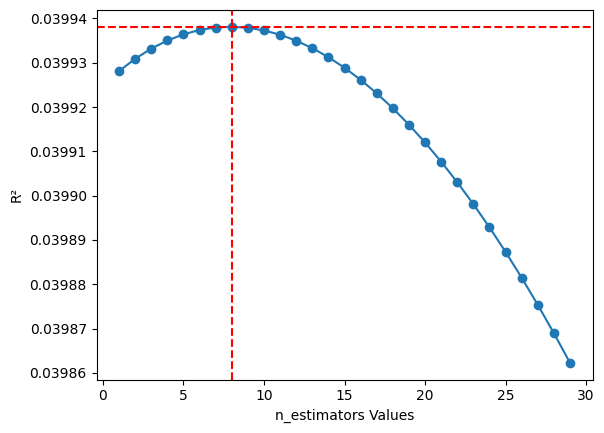

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(alpha, r2_list, marker='o')
plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

#### 3.9.3.2 Fiding the best max_iter

In [ ]:
max_iter = [1, 50, 1000] 
r2_list = []


for i in max_iter:
    # Model
    ridge = lm.Ridge(alpha= 8, max_iter=i, random_state=42)
    # Fit
    ridge.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = ridge.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


In [ ]:
rmse_list

[21.411228443084262, 21.411228443084262, 21.411228443084262]

Min RMSE: 21.411228443084262


Text(0, 0.5, 'RMSE')

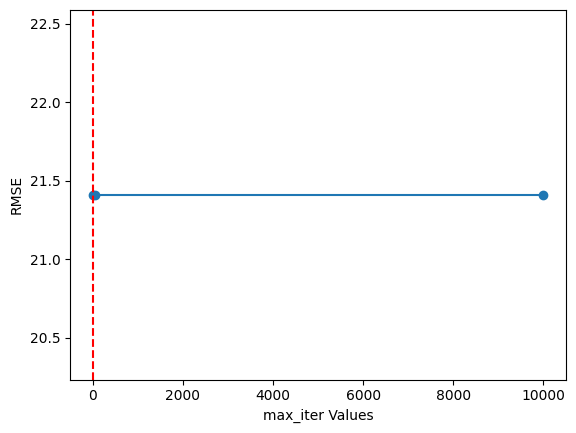

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
plt.axvline(x=8, color='r', linestyle='--')
#plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('RMSE')

Max r²: 0.03993810419903965


Text(0, 0.5, 'R²')

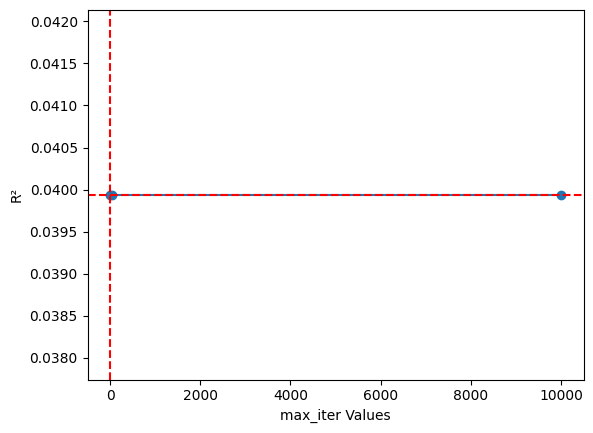

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('R²')

### 3.9.4 Training The Model With The Best Parameters

In [127]:
ridge = lm.Ridge(alpha=8, max_iter=1, random_state=42)
ridge.fit(X, y)

Ridge(alpha=8, max_iter=1, random_state=42)

### 3.9.5 Performance

#### 3.9.5.1 Performance Over Training Data

In [128]:
yhat_train = ridge.predict(X_training)
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.0458107932562426
MSE do treino: 456.0
RMSE do treino: 21.354156504062622
Mean Absolute Error (MAE) do treino: 17.00783895612643
Mean Absolute Percentage Error (MAPE) do treino: 8.647086297060506


In [129]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)


#### 3.9.5.2 Performance Over Validation Data

In [130]:
yhat_val = ridge.predict(X_val)

# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.041206106044434754
MSE da validação: 458.0
RMSE da validação: 21.400934559032695
Mean Absolute Error (MAE) da validação: 17.03318467203912
Mean Absolute Percentage Error (MAPE) da validação: 8.672524687278068


In [131]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.9.5.3 Performance Over Test Data

In [132]:
yhat_test = ridge.predict(X_test)
# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.05114370460750217
MSE de Teste: 462.0
RMSE de Teste: 21.494185260204677
Mean Absolute Error (MAE) de Teste: 17.14265395351758
Mean Absolute Percentage Error (MAPE) do treino: 8.536595972140402


In [133]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

## 3.10 Linear Regression Elastic Net

### 3.10.1 Default Model

In [ ]:
elastic_net_default = lm.ElasticNet(random_state=42)
elastic_net_default.fit(X_training, y_training)

In [ ]:
yhat_train = elastic_net_default.predict(X_training)
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.007831741118630053
MSE do treino: 474.0
RMSE do treino: 21.77154105707724
Mean Absolute Error (MAE) do treino: 17.299506969671594
Mean Absolute Percentage Error (MAPE) do treino: 8.74270142356504


### 3.10.2 Testing Default Model Over Validation Data

In [ ]:
yhat_val = elastic_net_default.predict(X_val)
# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.00811707101546788
MSE da validação: 474.0
RMSE da validação: 21.77154105707724
Mean Absolute Error (MAE) da validação: 17.26290253848956
Mean Absolute Percentage Error (MAPE) da validação: 8.68111873802305


### 3.10.3 Fiding the best hyperparameters

#### 3.10.3.1 Fiding the best alpha value

In [ ]:
alpha = np.arange(1, 10, 1)
rmse_list = []
r2_list = []


for i in alpha:
    elastic_net = lm.ElasticNet(alpha=i, l1_ratio=0, random_state=42)
    elastic_net.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = elastic_net.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.510e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term

Min RMSE: 21.734301969434554


Text(0, 0.5, 'RMSE')

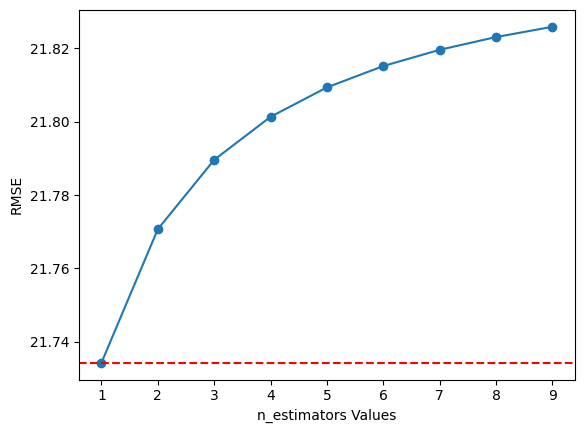

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(alpha, rmse_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('RMSE')

Max r²: 0.010746816892929445


Text(0, 0.5, 'R²')

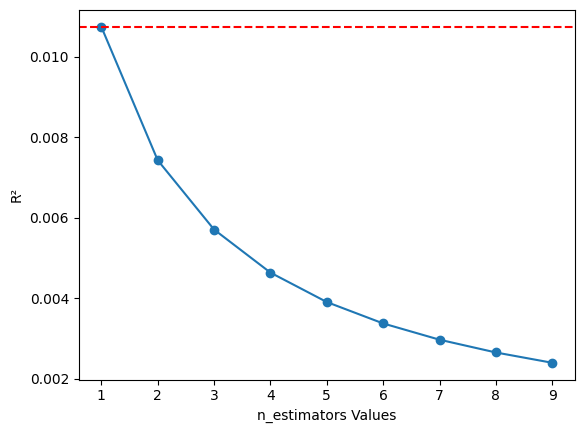

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(alpha, r2_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('n_estimators Values')
plt.ylabel('R²')

#### 3.10.3.2 Fiding the best l1_ratio

In [ ]:
l1_ratio = [0, 0.5, 1]
rmse_list = []
r2_list = []


for i in l1_ratio:
    elastic_net = lm.ElasticNet(alpha=1, l1_ratio=i, random_state=42)
    elastic_net.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = elastic_net.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Min RMSE: 21.734301969434554


Text(0, 0.5, 'RMSE')

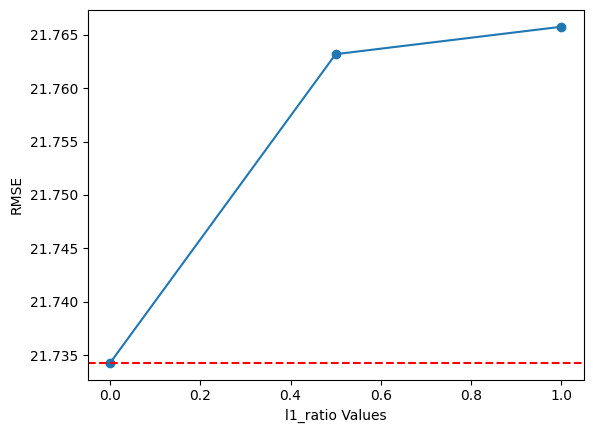

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(l1_ratio, rmse_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('l1_ratio Values')
plt.ylabel('RMSE')

Max r²: 0.010746816892929445


Text(0, 0.5, 'R²')

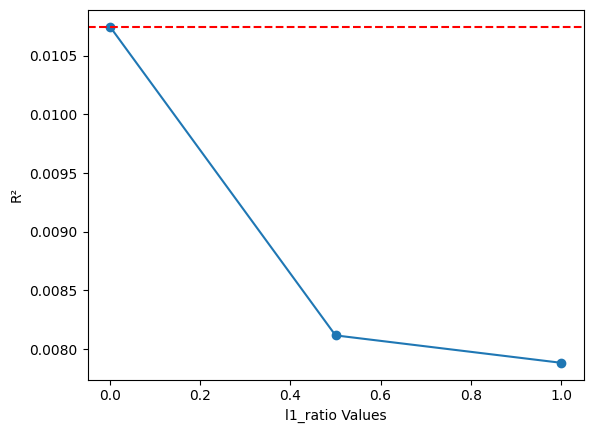

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(l1_ratio, r2_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('l1_ratio Values')
plt.ylabel('R²')

#### 3.10.3.3 Fiding the best max_iter

In [ ]:
max_iter = [1, 2, 30, 50]
rmse_list = []
r2_list = []


for i in max_iter:
    elastic_net = lm.ElasticNet(alpha=1, l1_ratio=0, max_iter=i, random_state=42)
    elastic_net.fit(X_training, y_training)
    
    # 2. Predict
    yhat_val = elastic_net.predict( X_val )

    # 3. Performance
    #RMSE
    mse = mt.mean_squared_error( y_val, yhat_val)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    #R²
    r2 = mt.r2_score( y_val, yhat_val )
    r2_list.append(r2)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term

Min RMSE: 21.734177398408857


Text(0, 0.5, 'RMSE')

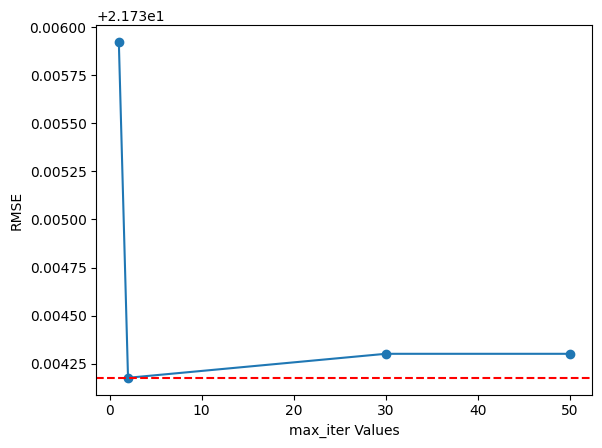

In [ ]:
min_rmse = min(rmse_list)

print("Min RMSE:", min_rmse)
plt.plot(max_iter, rmse_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=min_rmse, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('RMSE')

Max r²: 0.010758156749227643


Text(0, 0.5, 'R²')

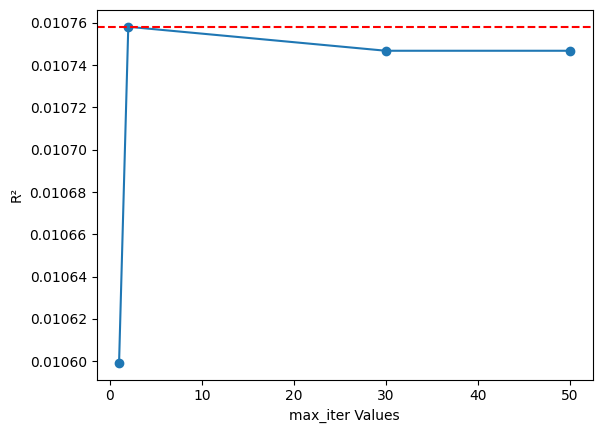

In [ ]:
max_r2 = max(r2_list)

print("Max r²:", max_r2)
plt.plot(max_iter, r2_list, marker='o')
#plt.axvline(x=8, color='r', linestyle='--')
plt.axhline(y=max_r2, color='r', linestyle='--')
plt.xlabel('max_iter Values')
plt.ylabel('R²')

### 3.10.4 Training With The Best Hyperparameters

In [134]:
elastic_net = lm.ElasticNet(alpha=1, l1_ratio=0, max_iter=2, random_state=42)
elastic_net.fit(X, y)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.576e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1, l1_ratio=0, max_iter=2, random_state=42)

### 3.10.5 Performance

#### 3.10.5.1 Performance Over Training Data

In [135]:
yhat_train = elastic_net.predict(X_training)
# R2 dos dados de treinamento
r2_train = mt.r2_score( y_training, yhat_train )
print('R² do treino: {}'.format(r2_train))

# MSE dos dados de treinamento
mse_train = np.round( mt.mean_squared_error ( y_training, yhat_train))
print('MSE do treino: {}'.format(mse_train))

#RMSE dos dados de treinamento
rmse_train = np.sqrt( mse_train )
print('RMSE do treino: {}'.format(rmse_train))

# MAE dos dados de treinamento
mae_train = mean_absolute_error(y_training, yhat_train)
print("Mean Absolute Error (MAE) do treino:", mae_train)


#MAPE dos dados de treinamento
def mean_absolute_percentage_error(y_training, yhat_train):
    y_training, yhat_train = np.array(y_training), np.array(yhat_train)
    return np.mean(np.abs((y_training - yhat_train) / y_training))

mape_train = mean_absolute_percentage_error(y_training, yhat_train)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_train)

R² do treino: 0.01066928537833689
MSE do treino: 473.0
RMSE do treino: 21.748563170931547
Mean Absolute Error (MAE) do treino: 17.280665564910564
Mean Absolute Percentage Error (MAPE) do treino: 8.741740744491416


In [136]:
# Add values on the lists

r2_list_train.append(r2_train)
mse_list_train.append(mse_train)
rmse_list_train.append(rmse_train)
mae_list_train.append(mae_train)
mape_list_train.append(mape_train)

#### 3.10.5.2 Performance Over Validation Data

In [137]:
yhat_val = elastic_net.predict(X_val)
# R2 dos dados de validação
r2_val = mt.r2_score( y_val, yhat_val )
print('R² da validação: {}'.format(r2_val))

# MSE dos dados de validação
mse_val = np.round( mt.mean_squared_error ( y_val, yhat_val))
print('MSE da validação: {}'.format(mse_val))

#RMSE dos dados de validação
rmse_val = np.sqrt( mse_val )
print('RMSE da validação: {}'.format(rmse_val))

# MAE dos dados de validação
mae_val = mean_absolute_error(y_val, yhat_val)
print("Mean Absolute Error (MAE) da validação:", mae_val)

#MAPE dos dados de validação
def mean_absolute_percentage_error(y_val, yhat_val):
    y_val, yhat_val = np.array(y_val), np.array(yhat_val)
    return np.mean(np.abs((y_val - yhat_val) / y_val))

mape_val = mean_absolute_percentage_error(y_val, yhat_val)
print("Mean Absolute Percentage Error (MAPE) da validação:", mape_val)

R² da validação: 0.010976257743894768
MSE da validação: 472.0
RMSE da validação: 21.72556098240043
Mean Absolute Error (MAE) da validação: 17.24604937609136
Mean Absolute Percentage Error (MAPE) da validação: 8.678639069305317


In [138]:
# Add values on the lists

r2_list_val.append(r2_val)
mse_list_val.append(mse_val)
rmse_list_val.append(rmse_val)
mae_list_val.append(mae_val)
mape_list_val.append(mape_val)

#### 3.10.5.3 Performance Over Test Data

In [139]:
yhat_test = elastic_net.predict(X_test)

# R2 dos dados de teste
r2_test = mt.r2_score( y_test, yhat_test )
print('R² de Teste: {}'.format(r2_test))

# MSE dos dados de teste
mse_test = np.round( mt.mean_squared_error ( y_test, yhat_test))
print('MSE de Teste: {}'.format(mse_test))

#RMSE dos dados de teste
rmse_test = np.sqrt( mse_test )
print('RMSE de Teste: {}'.format(rmse_test))

# MAE dos dados de teste
mae_test = mean_absolute_error(y_test, yhat_test)
print("Mean Absolute Error (MAE) de Teste:", mae_test)

#MAPE dos dados de teste
def mean_absolute_percentage_error(y_test, yhat_test):
    y_test, yhat_test = np.array(y_test), np.array(yhat_test)
    return np.mean(np.abs((y_test - yhat_test) / y_test))

mape_test = mean_absolute_percentage_error(y_test, yhat_test)
print("Mean Absolute Percentage Error (MAPE) do treino:", mape_test)


R² de Teste: 0.01059149342502852
MSE de Teste: 482.0
RMSE de Teste: 21.95449840010015
Mean Absolute Error (MAE) de Teste: 17.44856533430116
Mean Absolute Percentage Error (MAPE) do treino: 8.713512302730122


In [140]:
# Add values on the lists

r2_list_test.append(r2_test)
mse_list_test.append(mse_test)
rmse_list_test.append(rmse_test)
mae_list_test.append(mae_test)
mape_list_test.append(mape_test)

# 4 RESULTS

## 4.1 Creating dataframes with result

In [142]:
# Add the performance values to the train, val and test dataframes

performance_table_train = pd.DataFrame({ 
    'Algorithm': algorithm,
    'R²': r2_list_train,
    'MSE': mse_list_train,
    'RMSE': rmse_list_train,
    'MAE': mae_list_train,
    'MAPE': mape_list_train
})

performance_table_val = pd.DataFrame({ 
    'Algorithm': algorithm,
    'R²': r2_list_val,
    'MSE': mse_list_val,
    'RMSE': rmse_list_val,
    'MAE': mae_list_val,
    'MAPE': mape_list_val
})

performance_table_test = pd.DataFrame({ 
    'Algorithm': algorithm,
    'R²': r2_list_test,
    'MSE': mse_list_test,
    'RMSE': rmse_list_test,
    'MAE': mae_list_test,
    'MAPE': mape_list_test
})

## 4.2 Results Dataframes

In [143]:
performance_table_train

,Algorithm,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.045828,456.0,21.354157,17.007043,8.645896
1,Decision Tree Regressor,0.104054,428.0,20.688161,16.464077,8.755022
2,Random Forest Regressor,0.906056,45.0,6.708204,4.655849,8.893427
3,Polinomial Regression,0.091791,434.0,20.832667,16.505083,8.386161
4,Polinomial Regression Lasso,0.009115,474.0,21.771541,17.287914,8.741798
5,Polinomial Regression Ridge,0.091090,434.0,20.832667,16.514027,8.398784
6,Polinomial Regression Elastic Net,0.026213,465.0,21.563859,17.132296,8.742713
7,Linear Regression Lasso,0.007401,474.0,21.771541,17.305484,8.742731
8,Linear Regression Ridge,0.045811,456.0,21.354157,17.007839,8.647086
9,Linear Regression Elastic Net,0.010669,473.0,21.748563,17.280666,8.741741


In [144]:
performance_table_val

,Algorithm,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.041231,458.0,21.400935,17.034370,8.673336
1,Decision Tree Regressor,0.101050,429.0,20.712315,16.530505,8.702629
2,Random Forest Regressor,0.903408,46.0,6.782330,4.730846,8.828451
3,Polinomial Regression,0.080554,439.0,20.952327,16.620267,8.508183
4,Polinomial Regression Lasso,0.009650,473.0,21.748563,17.240347,8.678876
5,Polinomial Regression Ridge,0.080403,439.0,20.952327,16.622758,8.524215
6,Polinomial Regression Elastic Net,0.024652,466.0,21.587033,17.093208,8.681218
7,Linear Regression Lasso,0.007884,474.0,21.771541,17.264922,8.681850
8,Linear Regression Ridge,0.041206,458.0,21.400935,17.033185,8.672525
9,Linear Regression Elastic Net,0.010976,472.0,21.725561,17.246049,8.678639


In [145]:
performance_table_test

,Algorithm,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.051166,462.0,21.494185,17.144197,8.531355
1,Decision Tree Regressor,0.090475,443.0,21.047565,16.829781,8.723922
2,Random Forest Regressor,0.401348,291.0,17.058722,12.286841,8.891765
3,Polinomial Regression,0.090901,443.0,21.047565,16.736414,8.276972
4,Polinomial Regression Lasso,0.008803,483.0,21.977261,17.456171,8.711133
5,Polinomial Regression Ridge,0.090231,443.0,21.047565,16.742214,8.308501
6,Polinomial Regression Elastic Net,0.023366,476.0,21.817424,17.310629,8.717941
7,Linear Regression Lasso,0.007646,483.0,21.977261,17.472989,8.713266
8,Linear Regression Ridge,0.051144,462.0,21.494185,17.142654,8.536596
9,Linear Regression Elastic Net,0.010591,482.0,21.954498,17.448565,8.713512
